### 2021 Spring "EE479: Scientific Computing & Data"
#### Dr. J. Park, KAIST Electrical Engineering
#### Kutz 21.3 Lorenz Attractor with Data Assimilation Method
#### 2021. 05. 18 Revised from matlab version

Solve initial value perturbation (with Gaussian Distribution) problem with data points (experimental observation with error - GD) for long term dynamics.

$$\frac{dx}{dt} = \sigma(y-x)$$
$$\frac{dy}{dt} = x(\rho-z) - y$$
$$\frac{dz}{dt} = xy - \beta z$$


In [1]:
### "qt" backend to rotate axis
%matplotlib inline    
#%matplotlib qt  

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

### using home-made NA routine of RK4 

In [2]:
### one time-step solver for y'=f(y,t) with y-list for coupled 1st order ODE
#from myode import RK4
def RK4(f, y0, t, args=()):
    '''
    applied to any f of y'=f(y,t)
    '''
    n = len(t)
    y = np.zeros((n, len(y0)))    # prepare y.shape (Nstep, num_of_coupled_eq(ind_var))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

def Lorenz_RK4(T, dt, x0, sig, bet, rho, Nstep=None):
    '''
    call RK4 method to run f=Lorenz_eq
    running function (RK4) should have form of (f, y0, t-array, *args)
    prepare t-array
    call RK4: y.shape=(Nstep, num_of_coupled_eq(independent var))
    '''
    if not Nstep:
        Nstep = int(round(T/dt))
    t = np.linspace(0, Nstep*dt, Nstep+1)
    
    sol = RK4(Lorenz_eq, x0, t, args=(sig, bet, rho))
    #print(sol.shape)
    return sol.T

In [3]:
def Lorenz_eq(y, t, sig, bet, rho ):
    '''
    solve y[i+1] at given t=t[i] using y[i], t[i], where i is time index
          y is multiple dependent variables
    '''
    return np.array([sig * (y[1]-y[0]), y[0]*(rho - y[2]), y[0]*y[1] - bet * y[2]])



Lorenz_solver = Lorenz_RK4      # import module myode


### Figure 21.2, 21.3 

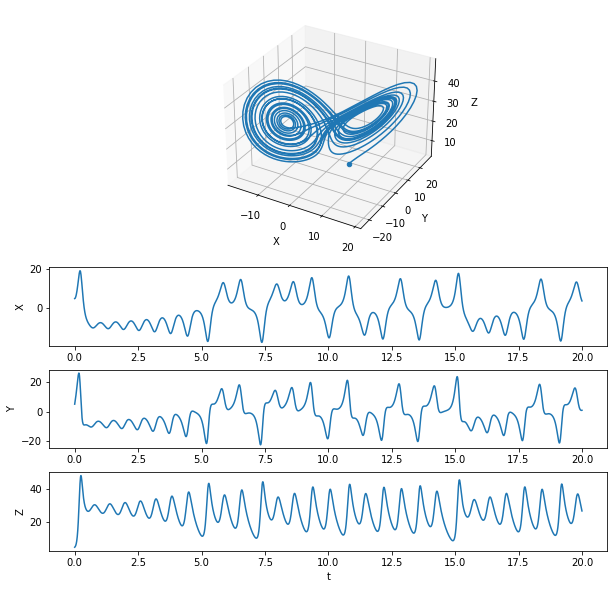

In [4]:
### exact solution for Lorenz equation
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(4, 1, height_ratios=[3,1,1,1])

ax1 = fig.add_subplot(gs[0], projection='3d')
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])
### Lorentz parameters
sig = 10.
bet = 8./3.
rho = 28.            # 9, 13, 15, 28

### dynamics parameters
T = 20
dt = 0.01
N_t = int(round(T/dt))
t = np.linspace(0, N_t*dt, N_t+1)
### initial condition
x0 = [5,5,5]

### plot Lorenz in 3D
xt = Lorenz_solver(T, dt, x0, sig, bet, rho)

ax1.plot(xt[0],xt[1],xt[2])
ax1.scatter(xt[0,0], xt[1,0], xt[2,0])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2.plot(t, xt[0])
ax3.plot(t, xt[1])
ax4.plot(t, xt[2])
ax2.set_ylabel('X')
ax3.set_ylabel('Y')
ax4.set_ylabel('Z')
ax4.set_xlabel('t')

plt.show()

# Initial condition sensitivity test 
### ( Failure in long time dynamics )
### Figure 21.4 
#### The perturbed dynamics keeps true dynamics up to t ~ 5
#### 8 random perturbation at initial value using Gaussian distribution

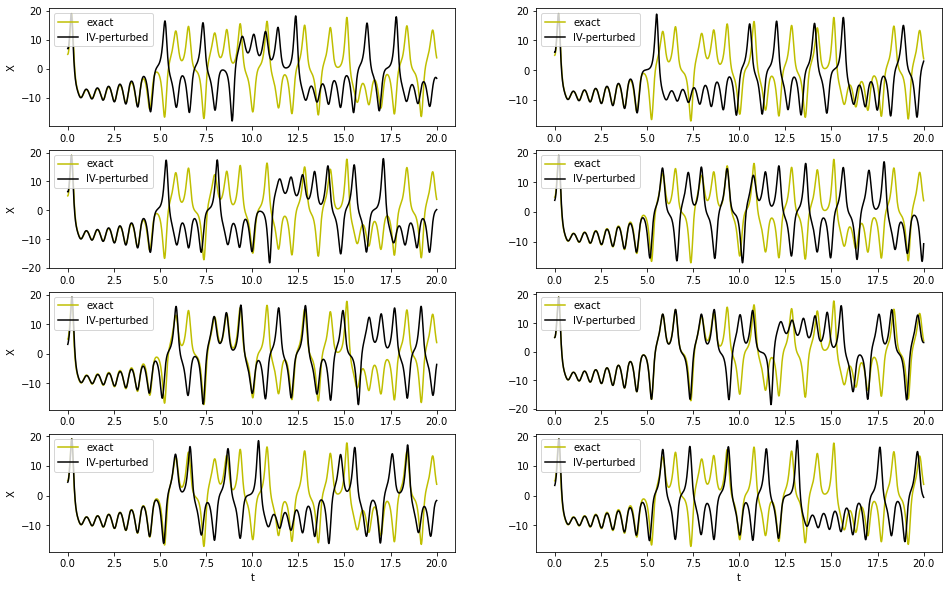

In [7]:
### Lorentz Attractor in mpl
from numpy import zeros, linspace
import matplotlib.pyplot as plt
import numpy as np
import copy

fig, axes  = plt.subplots(4,2, figsize=(16,10)) 
npert = [4,2]                    # number of axes == number of npert

### Lorentz parameters
sig = 10.
bet = 8./3.
rho = 28.            # 9, 13, 15, 28

### dynamics parameters
T = 20
dt = 0.01
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)
### initial condition
x0 = [5,5,5]     # for x0, y0, z0

### plot Lorenz in 3D
xt = Lorenz_solver(T, dt, x0, sig, bet, rho)

sig2 = 1
pertx = sig2 * np.random.randn(*npert)
#pert2d = pert.reshape(4,2)
#print(f"{pert2d}")
for i in range(4):
    for j in range(2):
        if j == 0:
            axes[i,j].set_ylabel('X')
        xi_p = [x0[0] + pertx[i,j], x0[1], x0[2]]
        xt_p = Lorenz_solver(T, dt, xi_p, sig, bet, rho)
        axes[i,j].plot(t, xt[0], 'y')               # standard value
        axes[i,j].plot(t, xt_p[0], 'k')              # perturbed value
        axes[i,j].legend(['exact', 'IV-perturbed'])  # IV is initial value
        
        if i == 3:
            axes[i,j].set_xlabel('t')
plt.show()

# Getting experimental observation data for Data Assimilation Dynamics
### Figure 21.5
#### getting two points in unit time for the dynamics of Lorenz equation


(3, 2001) (3, 41)


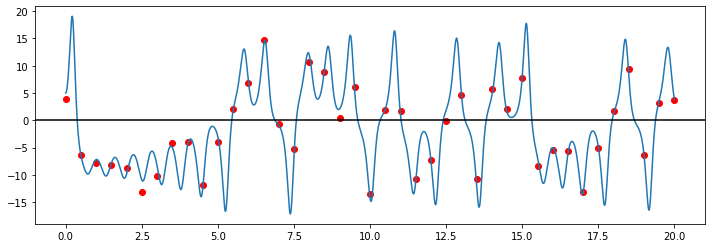

In [8]:
fig = plt.figure(figsize=(12, 4))
ax  = plt.axes()
#fig, ax  = plt.subplots(figsize=(12,4)) 

### Lorentz parameters
sig = 10.
bet = 8./3.
rho = 28.            # 9, 13, 15, 28

### dynamics parameters
T = 20
dt = 0.01
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)

Npert_1t = 2            # number of perturbation data in unit t
Nobs_int = int(1/(dt*Npert_1t))
#print(Nobs_int)

### initial condition
x0 = [5,5,5]

sig3 = 1                    ### error strenth: use less than std=1
### plot Lorenz in 3D
xt    = Lorenz_solver(T, dt, x0, sig, bet, rho)
xt_p   = copy.deepcopy(xt[:,::Nobs_int])
xt_p  += sig3*np.random.normal(size=xt_p.shape)   # error in observation time of t_p
t_p    = t[::Nobs_int]
print(xt.shape, xt_p.shape)

ax.plot(t, xt[0])
ax.scatter(t_p, xt_p[0], color='red')
plt.axhline(0.0, color='black')

plt.show()


## Data Assimilated Dynamics of Lorenz Equation
### Figure 21.6
### successful long time dynamics
#### using the Gaussian dispersed data points obtained in the above
### $$ \bar{x}_{k+1} = x_{0, k+1} + K_{k+1} (y_{k+1} - x_{0, k+1})$$

<ipython-input-2-b6c0a374aa2d>:9: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  y[0] = y0


[]

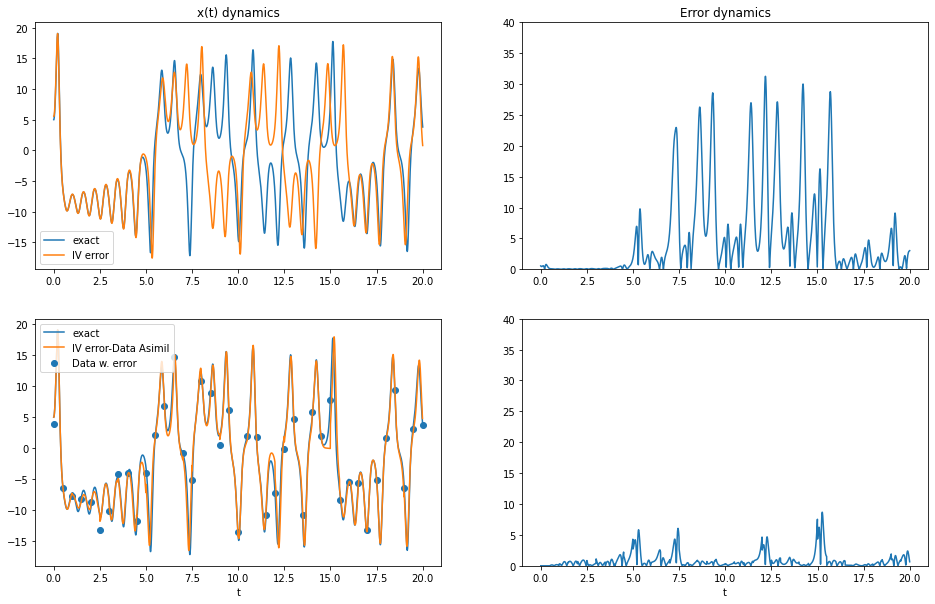

In [9]:
fig, axes  = plt.subplots(2,2, figsize=(16,10)) 

### Lorentz parameters
sig = 10.
bet = 8./3.
rho = 28.            # 9, 13, 15, 28

### dynamics parameters
T = 20
dt = 0.01
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)

x0 = [5,5,5]
xt = Lorenz_solver(T, dt, x0, sig, bet, rho)
### Observation data comes from above : t_p, xt_p - Gaussian perturbation from Lorenz equation

### inition value error via Gaussian perturbation
pert = sig2 * np.random.randn(1)
x_ip = [x0[0] + pert, x0[1], x0[2]]            # ip : Initial Value Perturbation
xt_ip = Lorenz_solver(T, dt, x_ip, sig, bet, rho)

xt_dd = np.zeros([3,1])                        # dd : Data-Driven
K = sig2 / (sig2 + sig3)                       # Kalman gain
ind_pre = 0

for i in range(t_p.size-1):                    #
    t_obs   = t_p[i+1]                         # t_obs: observation time
    ind     = np.where(t == t_obs)             # where returns array of array
    Nstep   = ind[0][0] - ind_pre
    xt_int  =  Lorenz_solver(T, dt, x0, sig, bet, rho, Nstep=Nstep)  # xt in t-interval
    x0      = xt_int[:,-1]                      # x_t at t_obs
    x_obs   = xt_p[:,i+1]
    x0     += K * (x_obs - x0)                  # x_0 is x_bar, x_0 is changed in-place in array x_t_int
    xt_dd = np.hstack([xt_dd, xt_int[:,:-1]])
    ind_pre = ind[0][0]

xt_dd = np.delete(xt_dd, 0, axis=1)              # remove zeros column

axes[0,0].plot(t, xt[0], t, xt_ip[0])
axes[0,0].legend(['exact','IV error' ])
axes[0,0].set_title('x(t) dynamics')
axes[0,1].plot(t, np.abs(xt[0]-xt_ip[0]))
axes[0,1].set_title('Error dynamics')
axes[0,1].set_ylim(0, 40)
axes[1,0].plot(t, xt[0], t[:-1], xt_dd[0])      # xt_dd skipped the last data-point
axes[1,0].scatter(t_p, xt_p[0])
axes[1,0].legend(['exact','IV error-Data Asimil', 'Data w. error'])
axes[1,0].set_xlabel('t')
axes[1,1].plot(t[:-1], np.abs(xt[0,:-1]-xt_dd[0]))
axes[1,1].set_ylim(0, 40)
axes[1,1].set_xlabel('t')
plt.plot()